# Airbnb Price Prediction in Los Angeles, California  using Supervised Learning
**DataSet:**

Airbnb dataset from Los Angeles, California, USA is gathered for the supervised learning problem.

Dataset Link:  http://insideairbnb.com/get-the-data.html

The dataset consist of several features such as host name, host url, number of reviews, number of beds, number of accommodates, availability, review score, etc. For more details about the data dictionary : https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896.


**Problem:** What predicts the Airbnb price? What directs the Airbnb rental price? Number of beds? Number of guest allowed? Review score? Location? Neighbourhood? Type of property? Type of room?

Insights from these questions provide interesting benefits to the host looking to maximize their profit and for anyone who wants to start airbnb business in Los Angeles.

**Approach/Models:** The question falls into the category of regression and prediction, so linear regression models are used. To compare the model, Decision Tree regressor and Random forest regressor are used. 





## Importing required libraries and modules for our model.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import csv
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Dataset into python dataframe.

In [4]:
df = pd.read_csv('LA_listings.csv')

##Overview of the dataset

In [5]:
df.shape

(33329, 73)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            33329 non-null  int64  
 1   listing_url                                   33329 non-null  object 
 2   scrape_id                                     33329 non-null  float64
 3   last_scraped                                  33329 non-null  object 
 4   name                                          33327 non-null  object 
 5   description                                   32231 non-null  object 
 6   neighborhood_overview                         20108 non-null  object 
 7   picture_url                                   33329 non-null  object 
 8   host_id                                       33329 non-null  int64  
 9   host_url                                      33329 non-null 

From the above summary, our dataframe consists of 73 columns and 33329 rows.

Let us find if our data object has right type of data in it using head() function.

In [7]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,2.021120e+13,12/6/2021,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,6/27/2008,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,1.0,NaN,Culver City,Other Cities,33.98301,-118.38607,Entire condominium (condo),Entire home/apt,6,2,2.0,3.0,"[""Free parking on premises"", ""Shampoo"", ""TV wi...",115,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,1,0,0,0,226,12/6/2021,2,0,0,8/15/2011,5/15/2016,4.00,5.00,5.00,3.00,4.00,5.00,4.00,NaN,0,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,2.021120e+13,12/6/2021,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,9/16/2008,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,1.0,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09625,-118.34605,Private room in rental unit,Private room,1,1,1.0,1.0,"[""Free parking on premises"", ""Shampoo"", ""Dishe...",89,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,1,1,22,52,327,12/6/2021,33,5,0,12/29/2017,11/1/2021,4.82,4.79,4.91,5.00,4.97,5.00,4.85,NaN,1,3,0,3,0,0.69
2,2732,https://www.airbnb.com/rooms/2732,2.021120e+13,12/6/2021,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,9/17/2008,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,37%,t,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,1.0,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00440,-118.48095,Private room in rental unit,Private room,1,1,1.0,1.0,"[""Washer"", ""Heating"", ""Microwave"", ""Host greet...",167,7,27,7.0,7.0,27.0,27.0,7.0,27.0,

Host Location consist of cities other than Los Angeles cities, e.g San Francisco, some other countries like Mexico, India, China. Selecting only the cities that come under Los Angeles, California, USA.

In [8]:
df=df.loc[df['host_location'].isin(["Los Angeles, California, United States","Santa Monica, California, United States","Bellflower, California, United States","Long Beach, California, United States","Redondo Beach, California, United States","Hermosa Beach, California, United States","Malibu, California, United States","Lynwood, California, United States","Culver City, California, United States","Pasadena, California, United States","Los Angeles County, California, United States","West Hollywood, California, United States","Lakewood, California, United States","Carson, California, United States","Beverly Hills, California, United States","Calabasas, California, United States","Santa Clarita, California, United States","Westside: Marina Del Rey adjacent neighborhood, Venice and Santa Monica neighbor","El Segundo, California, United States","South Pasadena, California, United States","Manhattan Beach, California, United States","Glendale, California, United States","Burbank, California, United States","Whittier, California, United States","Alhambra, California, United States","Los angeles,CA and Red Bluff, CA","Hidden Hills, California, United States","San Fernando, California, United States","Santa Monica Mountains","Monrovia, California, United States","Walnut Creek, California, United States","Diamond Bar, California, United States","Rancho Palos Verdes, California, United States","Palmdale, California, United States","Monterey Park, California, United States","Inglewood, California, United States","Azusa, California, United States","Arcadia, California, United States","Gardena, California, United States","Compton, California, United States","Los Angeles County, California, USA","Anaheim, California, United States","Cerritos, California, United States","Glendora, California, United States","Orange County, California, United States","Lawndale, California, United States","Artesia, California, United States","La Verne, California, United States","Avalon, California, United States","Berkeley, California, United States","Venice Beach, California, United States","San Dimas, California, United States","Huntington Beach, California, United States","Huntington Park, California, United States","Chino Hills, California, United States","Lancaster, California, United States","Rosemead, California, United States","South Gate, California, United States","Corona, California, United States","Walnut, California, United States","Maywood, California, United States","Commerce, California, United States","Hawaiian Gardens, California, United States"])]

In [9]:
df.shape

(21582, 73)

After filtering out other country data from the dataset, the rows are 21582 and colomns are 73. Now only the potential features that will be useful for our model is selected.


In [10]:
price_df=df[['host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude' ,'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable']]

In [11]:
price_df.shape

(21582, 16)

## Dealing with missing data

In [12]:
price_df.isna().sum()

host_total_listings_count       0
host_identity_verified          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                     2502
beds                         1126
price                           0
minimum_nights                  0
maximum_nights                  0
has_availability                0
number_of_reviews               0
review_scores_rating         4126
instant_bookable                0
dtype: int64

In [13]:
#Filling the nulls in review_score_rating with median
price_df['review_scores_rating'].fillna(price_df['review_scores_rating'].median(), inplace=True)

In [14]:
#Droping nulls
price_df.dropna(inplace=True)

In [15]:
price_df.describe()

,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,instant_bookable
count,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.000000,18199.00000
mean,11.854388,0.860981,34.052049,-118.336328,3.859718,1.703720,2.158635,273.188802,20.587395,648.080444,0.975603,39.987307,4.746622,0.31705
std,33.320784,0.345975,0.135931,0.149912,2.655504,1.118795,1.623358,671.814271,34.991148,504.377977,0.154282,74.710745,0.551104,0.46534
min,0.000000,0.000000,33.338480,-118.916410,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,34.002185,-118.431925,2.000000,1.000000,1.000000,82.000000,2.000000,84.000000,1.000000,1.000000,4.750000,0.00000
50%,2.000000,1.000000,34.064130,-118.353130,3.000000,1.000000,2.000000,130.000000,30.000000,1125.000000,1.000000,9.000000,4.880000,0.00000
75%,6.000000,1.000000,34.110085,-118.260440,5.000000,2.000000,3.000000,240.000000,30.000000,1125.000000,1.000000,44.000000,4.970000,1.00000
max,659.000000,1.000000,34.721380,-117.705940,16.000000,15.000000,26.000000,21053.000000,1124.000000,3650.000000,1.000000,1115.000000,5.000000,1.00000


In [16]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18199 entries, 1 to 33326
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18199 non-null  float64
 1   host_identity_verified     18199 non-null  float64
 2   latitude                   18199 non-null  float64
 3   longitude                  18199 non-null  float64
 4   property_type              18199 non-null  object 
 5   room_type                  18199 non-null  object 
 6   accommodates               18199 non-null  int64  
 7   bedrooms                   18199 non-null  float64
 8   beds                       18199 non-null  float64
 9   price                      18199 non-null  int64  
 10  minimum_nights             18199 non-null  int64  
 11  maximum_nights             18199 non-null  int64  
 12  has_availability           18199 non-null  int64  
 13  number_of_reviews          18199 non-null  int

In [17]:
# converting float to integer type
clean_df=price_df.astype({"bedrooms":'int', "beds":'int', "host_total_listings_count":'int', "host_identity_verified":'int'})

##Dealing with outliers

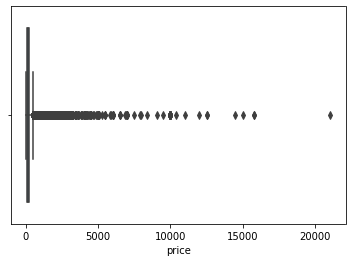

In [18]:
sns.boxplot(clean_df['price'])

Applying Interquartile range for removing outliers.

In [19]:
q1= clean_df['price'].quantile(0.25)
q3= clean_df['price'].quantile(0.75)
iqr= q3-q1
clean_df= clean_df[(clean_df['price'] < (q3 + 1.5 * iqr)) & (clean_df['price'] > (q1 - 1.5 * iqr))]

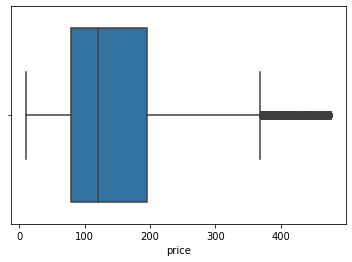

In [20]:
sns.boxplot(clean_df['price'])

Histogram showing the distribution of price variable.

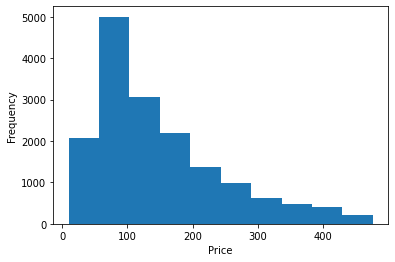

In [21]:
plt.hist(clean_df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

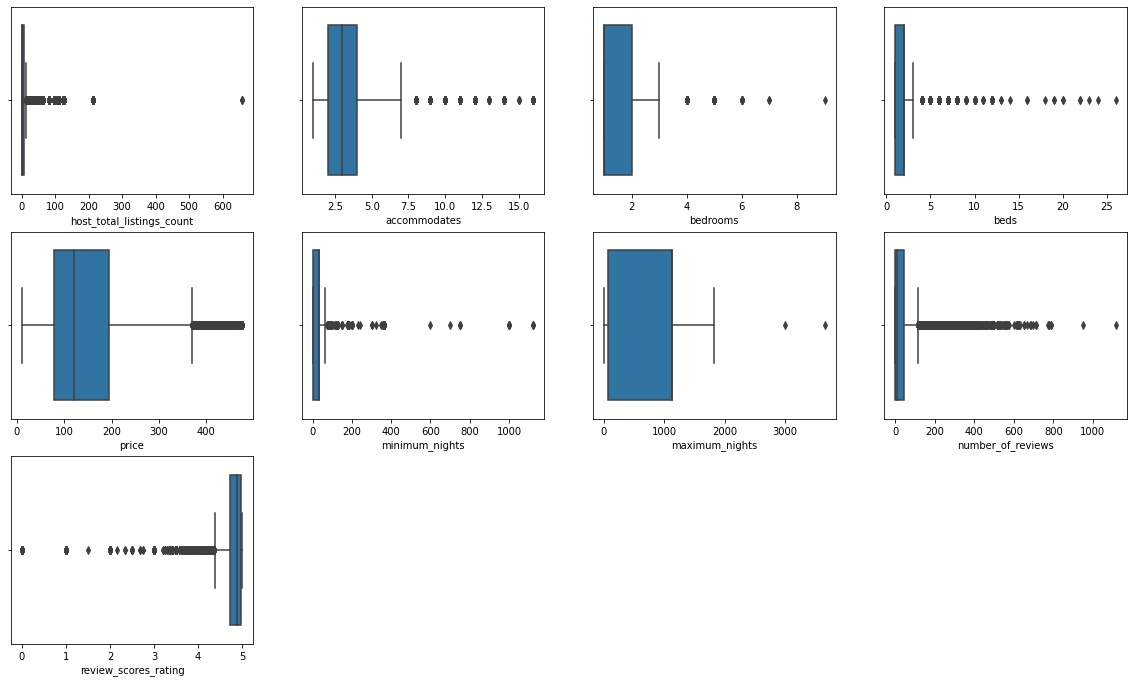

In [22]:
plt.figure(figsize = (20,20))
for i,col in enumerate(['host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']):
    plt.subplot(5,4,i+1)
    sns.boxplot(x = col, data = clean_df)
plt.show()

Price distribution based on room_type.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7649fffd0>,
      dtype=object)

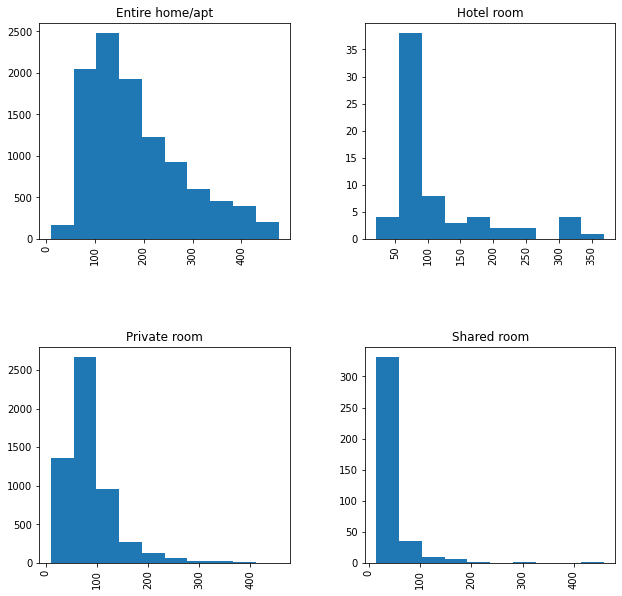

In [23]:
clean_df['price'].hist(by = clean_df['room_type'], alpha=1,figsize=(10, 10))

Multivariate Analysis using pairplot.

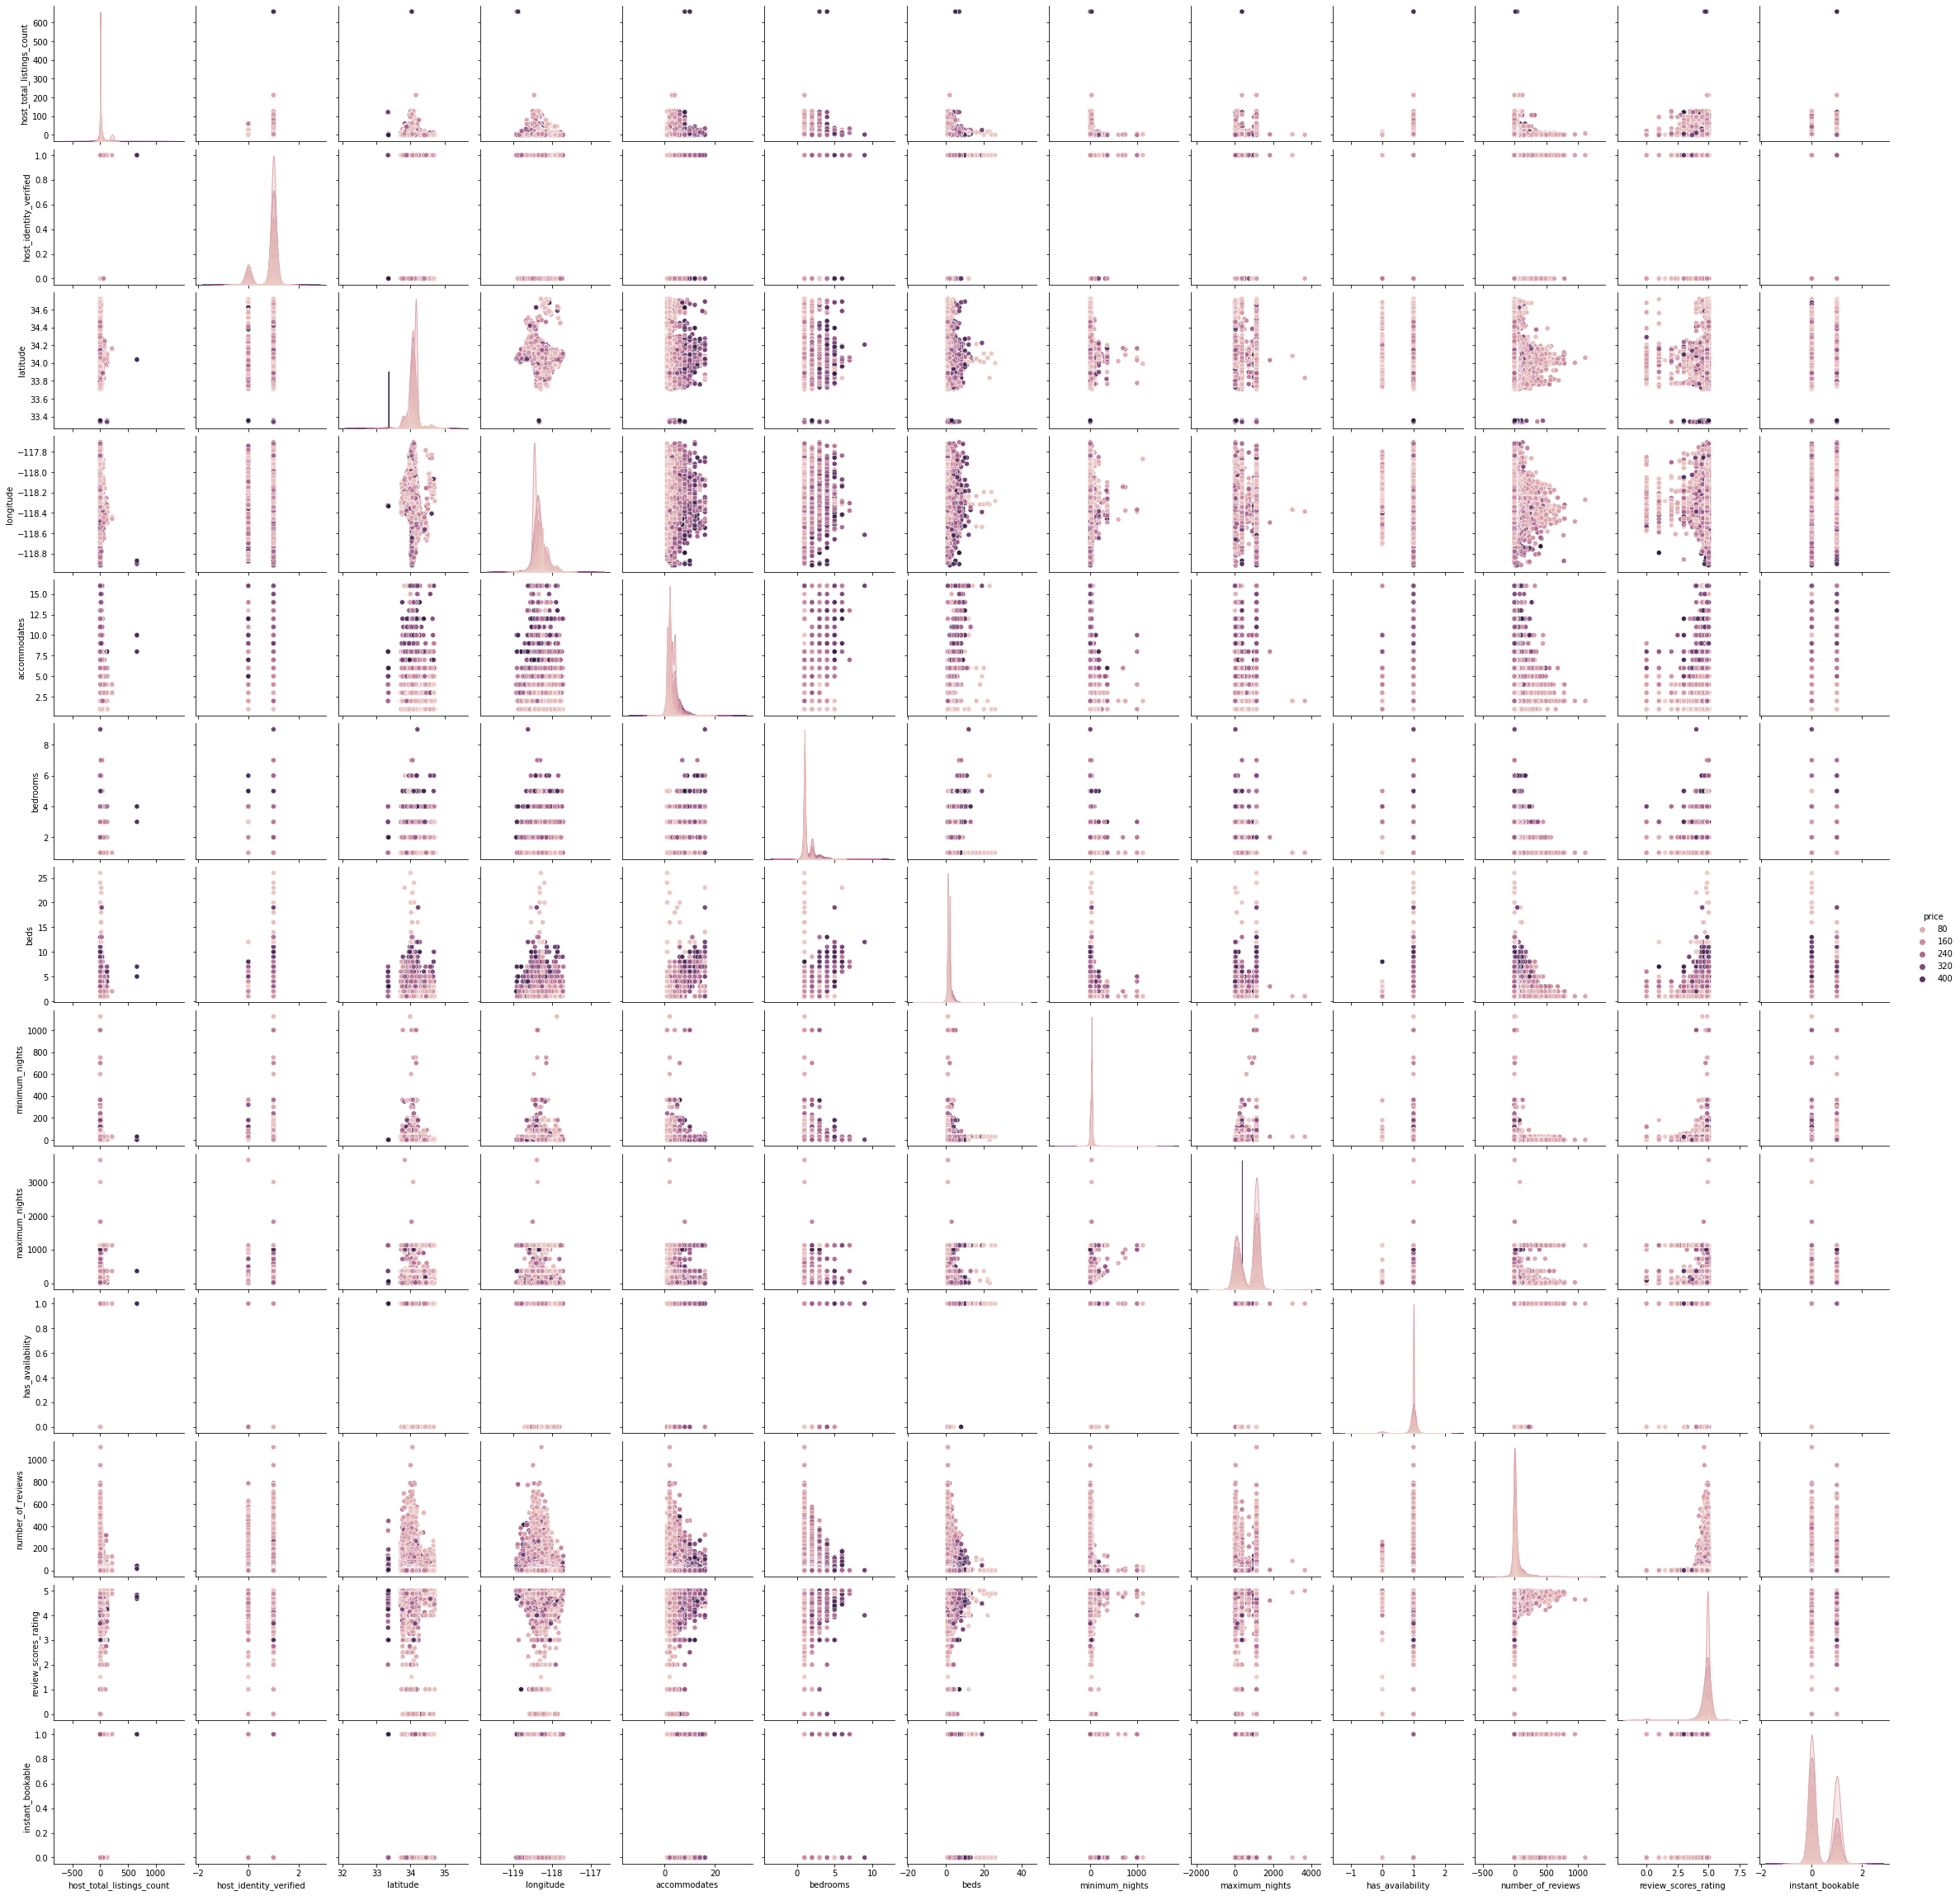

In [ ]:
sns.pairplot(clean_df,hue='price')

## Feature selection

Correlation between all the features and the target variable is shown below.

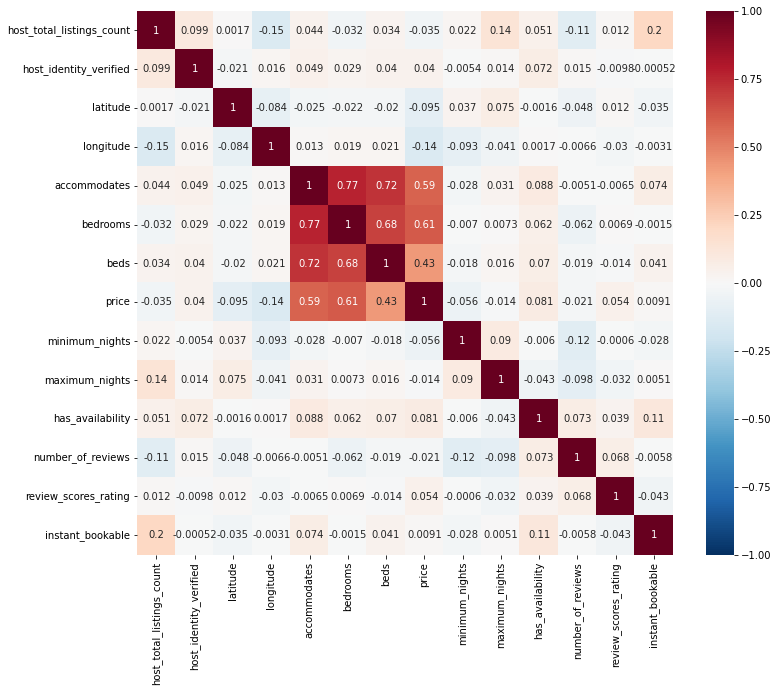

In [24]:
plt.figure(figsize = (12,10))
sns.heatmap(clean_df.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdBu_r', annot = True, data = clean_df)
plt.show()

As bedrooms, beds and accommodates features are highly correlated. Bedrooms is selected, removing beds and accommodates features.

In [25]:
new_df= clean_df.drop(['accommodates', 'beds'], axis = 1)

In [26]:
new_df.shape

(16397, 14)

In [27]:
new_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

Average Price per room type.

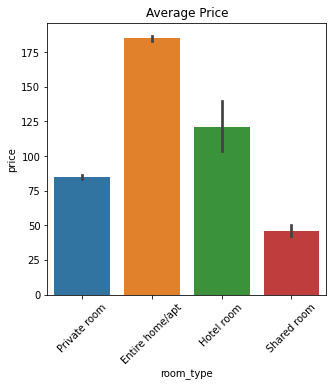

In [28]:
plt.figure(figsize=(5,5))

sns.barplot(new_df["room_type"], new_df["price"])
plt.title("Average Price")
plt.xticks(rotation = 45)
plt.show()

Average price for the room type "Entire home/apt" is higher than other room types.

Let's describe the type of property.

In [29]:
new_df['property_type'].describe()

count                  16397
unique                    84
top       Entire rental unit
freq                    4037
Name: property_type, dtype: object

Property type consist of 84 different categories. Combining the categories having counts lower than 100 into new category called "Other".

In [30]:
limit = 100
new_df['property_type'] = new_df['property_type'].map({x[0]: x[0] if x[1] > limit else 'Other' for x in dict(new_df['property_type'].value_counts()).items()})

In [31]:
new_df['property_type'].value_counts().to_frame()

,property_type
Entire rental unit,4037
Entire residential home,2868
Private room in residential home,2716
Private room in rental unit,1294
Entire guesthouse,884
Entire condominium (condo),818
Other,797
Entire guest suite,526
Entire bungalow,392
Private room in condominium (condo),377


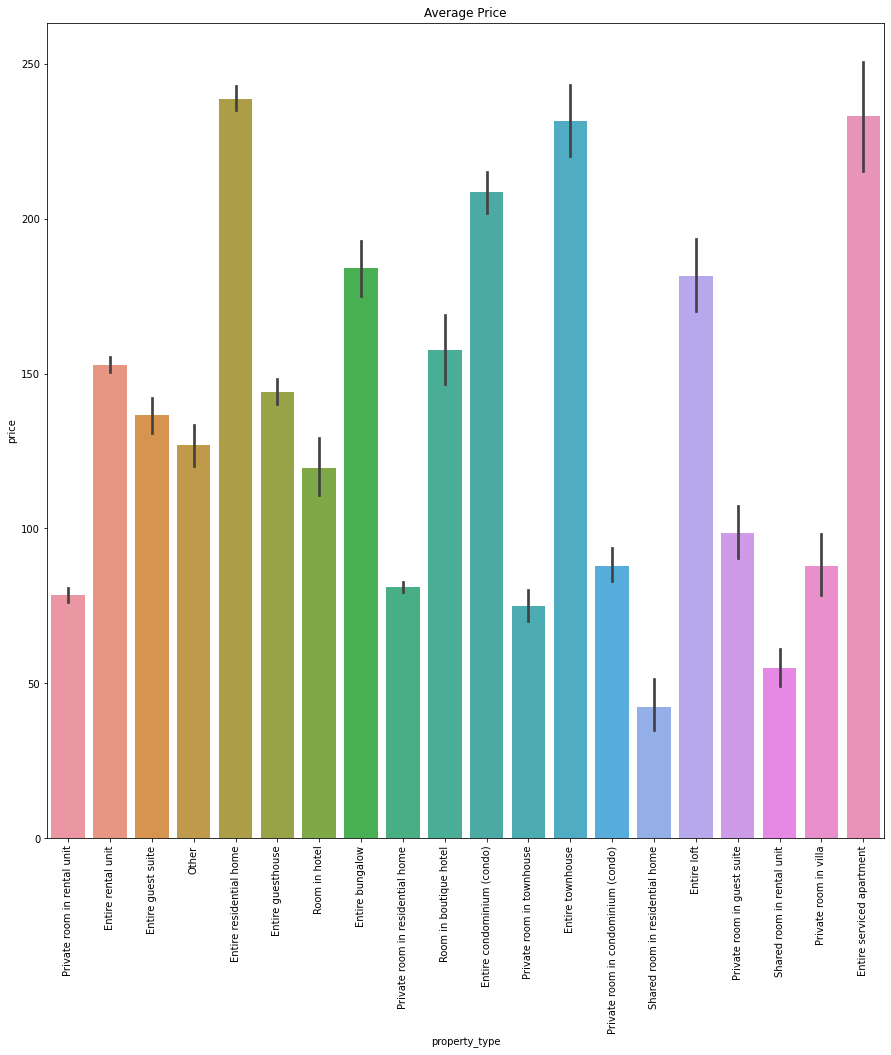

In [32]:
plt.figure(figsize=(15,15))

sns.barplot(new_df["property_type"], new_df["price"])
plt.title("Average Price")
plt.xticks(rotation = 90)
plt.show()

Property type "Entire residential home" and "Entire serviced apartment" costs more than other property types.

Dummy coding various categorical variables.

In [33]:
new_df=pd.get_dummies(new_df)

Using StatsModels to generate a starting point Ordinary Least Squares model.

In [34]:
X=new_df.drop('price', axis=1)
y=new_df['price']

In [35]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     428.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:31:34   Log-Likelihood:                -73722.
No. Observations:               13117   AIC:                         1.475e+05
Df Residuals:                   13083   BIC:                         1.478e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -8069.3553    386.747    -20.865      0.000   -8827.435   -7311.276
host_total_listings_count                            -0.0523      0.019     -2.738      0.006      -0.090      -0.015
host_identity_verified                                4.3103      1.696      2.541      0.011       0.986       7.635
latitude                                            -54.7962      4.495    -12.191      0.000     -63.607     -45.986
longitude                                          -104.4908      4.167    -25.074      0.000    -112.659     -96.322
bedrooms                                             51.2049      0.936     54.701      0.000      49.370      53.040
minimum_nights                                       -0.1908      0.018    -10.440      0.000      -0.227      -0.155
maximum_nights                                        0.0016      0.001      1.326      0.185      -0.001       0.004
has_availability                                      6.2272      3.796      1.640      0.101      -1.214      13.668
number_of_reviews                                    -0.0360      0.008     -4.502      0.000      -0.052      -0.020
review_scores_rating                                  6.0678      1.059      5.728      0.000       3.991       8.144
instant_bookable                                     -0.3294      1.292     -0.255      0.799      -2.861       2.202
property_type_Entire bungalow                      -411.2234     19.850    -20.716      0.000    -450.133    -372.314
property_type_Entire condominium (condo)           -391.1702     19.690    -19.866      0.000    -429.765    -352.575
property_type_Entire guest suite                   -432.6479     19.833    -21.814      0.000    -471.524    -393.772
property_type_Entire guesthouse                    -428.8151     19.785    -21.673      0.000    -467.597    -390.033
property_type_Entire loft                          -381.7135     20.073    -19.017      0.000    -421.059    -342.368
property_type_Entire rental unit                   -436.1497     19.645    -22.202      0.000    -474.656    -397.644
property_type_Entire residential home              -394.3341     19.601    -20.119      0.000    -432.754    -355.914
property_type_Entire serviced apartment            -361.2177     20.856    -17.320      0.000    -402.099    -320.337
property_type_Entire townhouse                     -410.1775     20.032    -20.476      0.000    -449.444    -370.911
property_type_Other                                -404.3023     19.569    -20.660      0.000    -442.661    -365.943
property_type_Private room in condominium (condo)  -419.1017     20.130    -20.820      0.000    -458.559    -379.645
property_type_P

OLS model explains 51.9% of variance in the target variable.
P-value under 0.05 is the standard threshold to give an idea of which ones are significantly contributing to the model. Ex. review_score_rating, bedrooms, property_types etc.
Insignificant features like maximum_nights, has_availability, instant_bookable have p value more than 0.05.

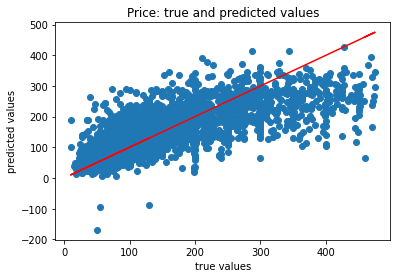

Mean absolute error of the prediction is: 48.68046180401433
Mean squared error of the prediction is: 4456.16113978374
Root mean squared error of the prediction is: 66.7544840425251
Mean absolute percentage error of the prediction is: 41.931026969170745


In [36]:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Price: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Scaling the features


In [37]:
# Y is the target variable
Y = np.log1p(new_df['price'])
X = new_df.drop('price', axis=1)

s= StandardScaler()
X=s.fit_transform(X)
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     530.9
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:31:46   Log-Likelihood:                -7211.1
No. Observations:               13117   AIC:                         1.449e+04
Df Residuals:                   13083   BIC:                         1.474e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8068      0.004   1310.929      0.000       4.800       4.814
x1            -0.0045      0.004     -1.136      0.256      -0.012       0.003
x2             0.0091      0.004      2.445      0.014       0.002       0.016
x3            -0.0473      0.004    -12.456      0.000      -0.055      -0.040
x4            -0.1061      0.004    -27.511      0.000      -0.114      -0.099
x5             0.2176      0.005     46.440      0.000       0.208       0.227
x6            -0.0414      0.004    -10.287      0.000      -0.049      -0.034
x7             0.0039      0.004      1.019      0.308      -0.004       0.011
x8             0.0080      0.004      2.111      0.035       0.001       0.016
x9            -0.0091      0.004     -2.340      0.019      -0.017      -0.001
x10            0.0259      0.004      6.970      0.000       0.019       0.033
x11           -0.0035      0.004     -0.911      0.363      -0.011       0.004
x12            0.0084      0.004      2.059      0.040       0.000       0.016
x13            0.0321      0.005      7.068      0.000       0.023       0.041
x14           -0.0188      0.004     -4.415      0.000      -0.027      -0.010
x15           -0.0121      0.005     -2.608      0.009      -0.021      -0.003
x16            0.0241      0.004      6.134      0.000       0.016       0.032
x17           -0.0466      0.006     -7.241      0.000      -0.059      -0.034
x18            0.0441      0.006      7.240      0.000       0.032       0.056
x19            0.0256      0.004      6.579      0.000       0.018       0.033
x20            0.0061      0.004      1.514      0.130      -0.002       0.014
x21            0.0099      0.004      2.536      0.011       0.002       0.018
x22           -0.0055      0.005     -1.107      0.268      -0.015       0.004
x23            0.0070      0.004      1.663      0.096      -0.001       0.015
x24           -0.0350      0.007     -4.950      0.000      -0.049      -0.021
x25           -0.0208      0.009     -2.290      0.022      -0.039      -0.003
x26           -0.0186      0.005     -3.975      0.000      -0.028      -0.009
x27            0.0104      0.004      2.565      0.010       0.002       0.018
x28            0.0641      0.005     14.009      0.000       0.055       0.073
x29            0.0294      0.004      6.961      0.000       0.021       0.038
x30            0.0343      0.005      6.465      0.000       0.024       0.045
x31            0.0050      0.006      0.886      0.376      -0.006       0.016
x32            0.1478      0.009     16.997      0.000       0.131       0.165
x33           -0.0259      0.004     -6.201      0.000      -0.034      -0.018
x34           -0.0948      0.009    -10.930      0.000      -0.112      -0.078
x35           -0.1624      0.007    -24.273      0.000      -0.175      -0.149
==

After Scaling, R2 is increased to 57.2%. The ols model explains 57.2% variance in the target variable.

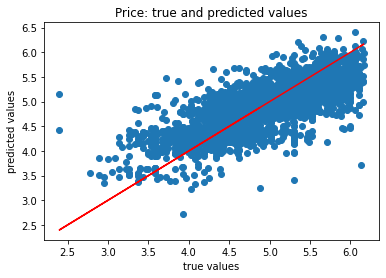

Mean absolute error of the prediction is: 0.3296421328104796
Mean squared error of the prediction is: 0.1799352276789286
Root mean squared error of the prediction is: 0.4241877269310471
Mean absolute percentage error of the prediction is: 7.084538924047505


In [38]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Price: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Using Linear Regression Model

In [39]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)


print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
lrm_score=lrm.score(X_test, y_test)
lrm_mae=mean_absolute_error(y_test, y_preds_test)
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.5724744567839885
-----Test set statistics-----
R-squared of the model in test set is: 0.5666467114863805
Mean absolute error of the prediction is: 0.3296492369281286
Mean squared error of the prediction is: 0.17993831041306338
Root mean squared error of the prediction is: 0.4241913606063464
Mean absolute percentage error of the prediction is: 7.084952116959737


Linear Regression model explians 57% variance in the training set and 56% variance in the test set.

Ridge penalizes coefficients by “shrinking” them and “smearing” their influence.Using ridge_cv to overcome overfitting in the model. Using hyperparameters alpha and crossvalidation.

In [40]:

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.5724739143103217
-----Test set statistics-----
R-squared of the model in test set is: 0.5666792073703051
Mean absolute error of the prediction is: 0.3296485685733466
Mean squared error of the prediction is: 0.17992481737031107
Root mean squared error of the prediction is: 0.42417545587918104
Mean absolute percentage error of the prediction is: 7.084725386551698


Using Decision Tree Regression Model

In [41]:
# Decision Tree regression model
y = new_df['price']
X = new_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)
pred = regressor.predict(X_test)
decision_score=regressor.score(X_test,y_test)
expl = explained_variance_score(pred,y_test)
err=mean_absolute_error(pred,y_test)

Using Random Forest Regression Model

In [42]:
y = new_df['price']
X = new_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
err_rf= mean_absolute_error(rf_pred,y_test)


In [43]:
print("Linear Regression Model Score is ",round(lrm_score,2))
print("Decision tree  Regression Model Score is ",round(regressor.score(X_test,y_test),2))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test),2))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Linear Regression','Decision Tree Regression','Random forest Regression'],
                            'Score':[lrm_score,decision_score,rf_score],
                            'MAE':[lrm_mae,err,err_rf]
                           })
models_score#.sort_values(by='Score')

Linear Regression Model Score is  0.57
Decision tree  Regression Model Score is  0.27
Random Forest Regression Model Score is  0.63


,Model,Score,MAE
0,Linear Regression,0.566647,0.329649
1,Decision Tree Regression,0.267420,54.236585
2,Random forest Regression,0.634345,40.279410


The above table defines the variability in the target variable Price by different models. 

Linear Regression model defines 57% variance in the target variable.

Random Forest Regression model defines the 63% variance in the target variable.

Decision tree regression model defines only 27% variance in the target variable and 73% of the variance is not defined.


Random Forest Regression model is best among the three models used here as it explains 63% variance in the target variable. 



Uses:
1. Airbnb prediction model predicts the price of the airbnb in Los Angeles depending on the host total listings, host identity verification, latitude, longitude, number of bedrooms, minimum nights, number of reviews, review score rating,  property type and room_type.

2. Property type like "Entire residential home" and "Entire serviced apartment" provide maximum profits than other property types.

3. The host who wants to start Airbnb should provide "Entire home/apt" for Airbnb as it would leads to most revenue.


Recommendations:
1. Hosts can maximize their profits by knowing the best times throughout the year and locations to put the Airbnb into market for people to use it.

2.	Identify suitable guests for the Airbnb depending on the location. Example if host are seeking business travelers from the corporate world, or is host property near local attractions such as an amusement park or historic site?

3.	Airbnb gets booked faster so it does not stay unoccupied in market for a long time .

